# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [155]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
import sklearn
import sklearn.metrics


%matplotlib inline

In [156]:
#ваш код 
data = pd.read_csv('Advertising.csv')
data.drop (columns=data.columns [0], axis= 1 , inplace= True )
data.head()


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [157]:
#ваш код 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [158]:
#ваш код 
# в данных нет пропусков

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [159]:
#ваш код 
X = data.drop('sales', axis=1)
#y = pd.DataFrame(data['sales'])
y = data['sales']

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [160]:
import numpy as np

X_ones = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
print(X_ones.shape, y.shape)


(200, 4) (200,)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [161]:
X_norm = X_ones / np.sqrt(np.sum(np.square(X_ones), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(n, m)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., m$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{m} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{m} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{n} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{m}x_{ij}$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [162]:
# ваш код 
num_iters = 1000 
m = X_norm.shape[0] 
n = X_norm.shape[1] 
w = np.ones(X_norm.shape[1]) 
for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X_norm[:,0:k] @ w[0:k]) + (X_norm[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X_norm[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X_norm @ w) - y) ** 2/(len(y))
print("Значения коэфициентов:", w)

Значения коэфициентов: [ 41.56217205 110.13144155  73.52860638  -0.55006384]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [163]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X_norm, y)
 
print(model.coef_)

[ 41.56217205 110.13144155  73.52860638  -0.55006384]


Если вы все сделали верно, они должны практически совпасть!

### Значение коэфициенотв получнных при реализации регресии из библиотеки sklearn и "вручную" полностью совпадают

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [164]:
#ваш код
X_scaled = (X-np.mean(X, axis=0))/np.std(X, axis = 0)


**Добавим единичный столбец**

In [165]:
X_scaled= np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [166]:
#ваш код
def mse_score(y, y_pred):
    return np.sum((y-y_pred)**2)/len(y)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [167]:
#ваш код
y_pred = y.apply(lambda x: y.mean())
print("MSE наивного прогноза:", round(mse_score(y, y_pred),3))

MSE наивного прогноза: 27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [168]:
#ваш код
def lin_pred(X, w):
    return X@w

In [169]:
## Для самопроверки получим предсказания с помощью функции lin_pred и оценим метрику MSE
y_test_pred = lin_pred(X_norm,w)
print("MSE тестового прогноза:", round(mse_score(y, y_test_pred),3))


MSE тестового прогноза: 2.784


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [170]:
def stoch_grad_step (X, y, w, train_ind, nu):
    wn = w.copy()
    for j in range(len(wn)):
        wn[j] = wn[j] - 2*nu* np.sum(X[train_ind][j]*(lin_pred(X[train_ind], wn)-y[train_ind]))/X.shape[0]
    return wn

### Значения метрик и коэффициентов довольно близки, что может говорить о правильности реализации алгоритма

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [171]:
#ваш код
import random
from numpy. linalg import norm
def stochastic_gradient_descent (X, y, w, nu, max_n_iter=5, delta_w=10):
    eps = 999999
    mse_list = []
    i = 0
    while (abs(eps) > delta_w) and i <= max_n_iter:
        l = random.randint(0, X.shape[0]-1)
        y_pred_i = lin_pred(X,w)
        mse_list.append(mse_score(y,y_pred_i))
        w_new = stoch_grad_step (X, y, w, l, nu)
        eps = norm(w-w_new)
        w = w_new
        i+=1
    return w, mse_list, eps, i

In [172]:
w = np.ones(X_scaled.shape[1]) 

w, mse_list, eps, i= stochastic_gradient_descent (X_scaled, y, w, 1, 100000, 0.0001)
t = X_scaled@w
mse_score(y,t)
print('Итоговое значение MSE:', mse_list[-1])
print('Значения коэффициентов:', w)
print('Колличество итераций алгоритма:', i)


Итоговое значение MSE: 2.8956737138972413
Значения коэффициентов: [13.98128624  3.97724967  2.49172959 -0.0892485 ]
Колличество итераций алгоритма: 518


In [173]:
# для проверки адекватности полученных решений, сравним метрику и коэффициенты для модели построенной библиотечным способом
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X_scaled, y)
print('Значение MSE при библиотечной реализации:', mse_score(y,X_scaled@model.coef_))
print('Значения коэффициентов при библиотеной реализации:', model.coef_)

Значение MSE при библиотечной реализации: 2.7841263145109365
Значения коэффициентов при библиотеной реализации: [14.0225      3.91925365  2.79206274 -0.02253861]


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

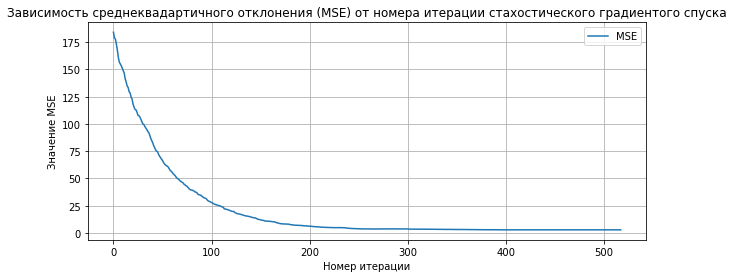

In [174]:
# ваш код
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
ax.plot(list(range(i)), mse_list, label='MSE')
#Даём графику название и подписываем оси
ax.set_title('Зависимость среднеквадартичного отклонения (MSE) от номера итерации стахостического градиентого спуска')
ax.set_xlabel('Номер итерации')
ax.set_ylabel('Значение MSE')
ax.legend();
ax.grid()

**Выведите вектор весов, к которому сошелся метод.**

In [175]:
# ваш код
print('Вектор весов к котрому сошелся метод:', w)

Вектор весов к котрому сошелся метод: [13.98128624  3.97724967  2.49172959 -0.0892485 ]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [176]:
# ваш код
print('Значение MSE на последней итерации', mse_list[-1])

Значение MSE на последней итерации 2.8956737138972413


## Выводы по проделанной работе.
### Был реализован алгоритм стахостического градиентого спуска. Качество метода оценивалось метрикой MSE. По графику зависимости MSE от номера итерации алгоритма видно, что значение метрики с каждой итерацией уменьшается, при этом основное улучшение происходит в начале, дальше метрика улучшается не значительно до тех пор пока значения коэфециентов не станут удовлетворять условию остановки алгоритма. Так же для оценки правильности реализауии алгорима была построена модель с использованием библиотечной реализацим. Значения метрик и коэфициентов свидетельствуют о правильности реализации алгоритма.